In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [5]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\preprocessed_day.csv"
df = pd.read_csv(data_path, encoding= 'unicode_escape')

### Decision Tree Regressor


In [6]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,0,0,0,0.363478,0.696087,0.248539,801,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,0,1,0.196364,0.437273,0.248309,1349,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,0,0,1,0.200000,0.590435,0.160296,1562,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0,0,1,0.226957,0.436957,0.186900,1600,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
# Creating a dependent variable for rented bike count
dependent_variable = 'cnt'

In [9]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['mnth_11',
 'weathersit_2',
 'mnth_6',
 'holiday',
 'weathersit_3',
 'weekday_2',
 'season_4',
 'hum',
 'mnth_8',
 'weekday_3',
 'mnth_12',
 'mnth_7',
 'weekday_6',
 'temp',
 'workingday',
 'windspeed',
 'yr',
 'mnth_5',
 'mnth_10',
 'mnth_2',
 'mnth_9',
 'weekend',
 'mnth_3',
 'weekday_4',
 'season_2',
 'mnth_4',
 'weekday_1',
 'season_3',
 'weekday_5']

In [10]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [11]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,0.335833,0.836250,0.226992,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.564167,0.523333,0.136817,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.657500,0.722917,0.117546,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.612500,0.576250,0.225117,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,0.340000,0.703333,0.106350,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,0.750833,0.655000,0.211454,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.633913,0.939565,0.192748,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,0.216667,0.861667,0.146775,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,0.678333,0.603333,0.177867,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.636667,0.554583,0.159825,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 29)
(584,)
(147, 29)
(147,)


In [14]:
X_train[0:10]

,yr,holiday,workingday,temp,hum,windspeed,weekend,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
97,0,0,1,0.335833,0.836250,0.226992,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
503,1,0,1,0.564167,0.523333,0.136817,0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
642,1,0,1,0.657500,0.722917,0.117546,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
498,1,0,0,0.612500,0.576250,0.225117,1,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
303,0,0,1,0.340000,0.703333,0.106350,0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False
570,1,0,1,0.750833,0.655000,0.211454,0,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
250,0,0,1,0.633913,0.939565,0.192748,0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
17,0,0,1,0.216667,0.861667,0.146775,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False
595,1,0,0,0.678333,0.603333,0.177867,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
240,0,0,1,0.636667,0.554583,0.159825,0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False


In [15]:
from sklearn.tree import DecisionTreeRegressor

D_tree = DecisionTreeRegressor(max_depth=9, splitter='best', max_features=None)

D_tree.fit(X_train,y_train)

import joblib

# Save the decision tree model
joblib.dump(D_tree, "decision_tree.pkl")

print("Model saved as decision_tree_model.pkl")

Model saved as decision_tree_model.pkl


In [16]:
D_tree.score(X_test,y_test)

0.8084879943445457

In [17]:
y_pred_train = D_tree.predict(X_train)
y_pred = D_tree.predict(X_test)

In [18]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 5.153603977688268.
The Mean Squred Error(MSE) is 54.40015046505802.
The Root Mean Squared Error(RMSE) is 7.375645765969107.
The R2 Score is 0.8084879943445457.
Adjusted R2 is 0.7610192066179801.


In [19]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [20]:
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.761


In [21]:
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [22]:
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [23]:
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

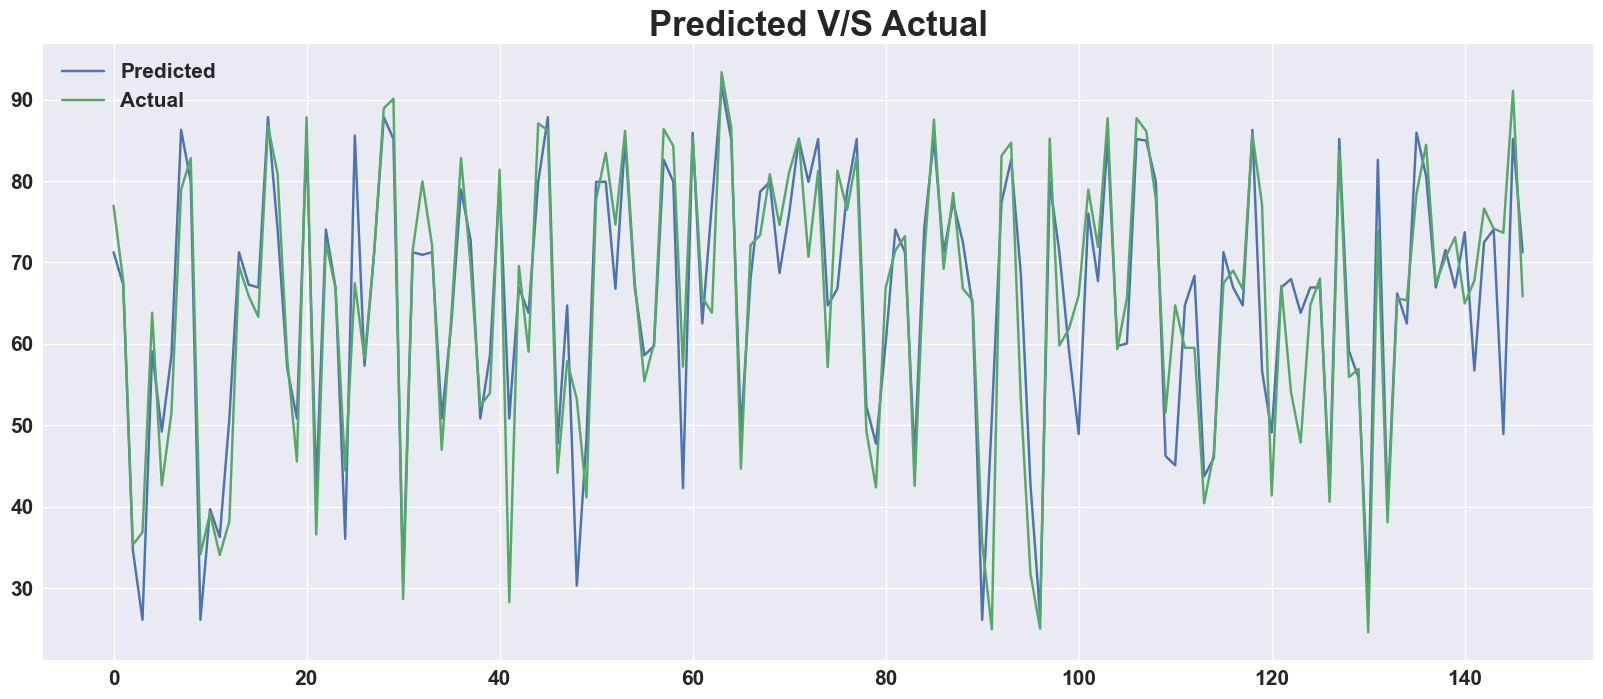

In [24]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

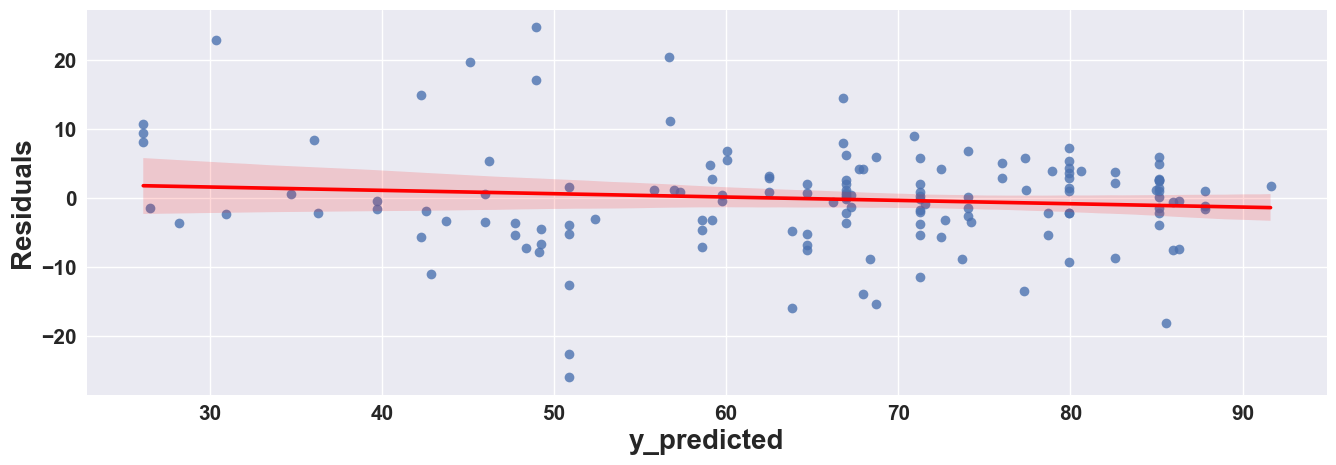

In [25]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

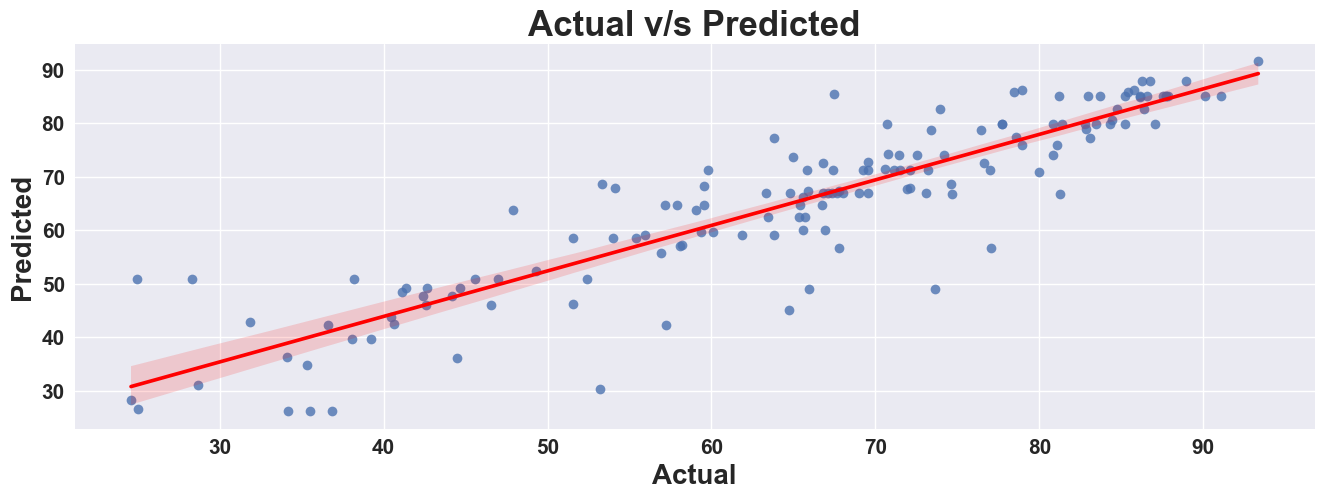

In [26]:
plot_scatter(y_pred,y_test)

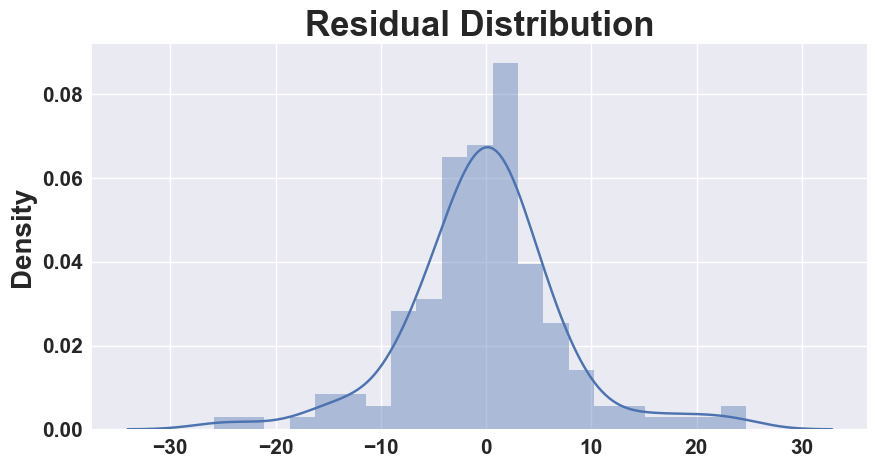

In [27]:
Residual_distPlot(y_pred,y_test)

In [28]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor()
parameters=parameters = parameters = {
    'criterion': ['squared_error', 'absolute_error'],  
    'max_depth': [5, 7, 9],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeRegressor(random_state=42)

tuning_model = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1
)

tuning_model.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [5, 7, ...], 'max_features': [None, 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [30]:
import joblib

# Save the decision tree model
joblib.dump(tuning_model, "decision_tree(CV).pkl")

print("Model saved as decision_tree_model(CV).pkl")

Model saved as decision_tree_model(CV).pkl


In [31]:
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 7, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -63.80559433589138


Text(0.5, 0, 'Relative Importance')

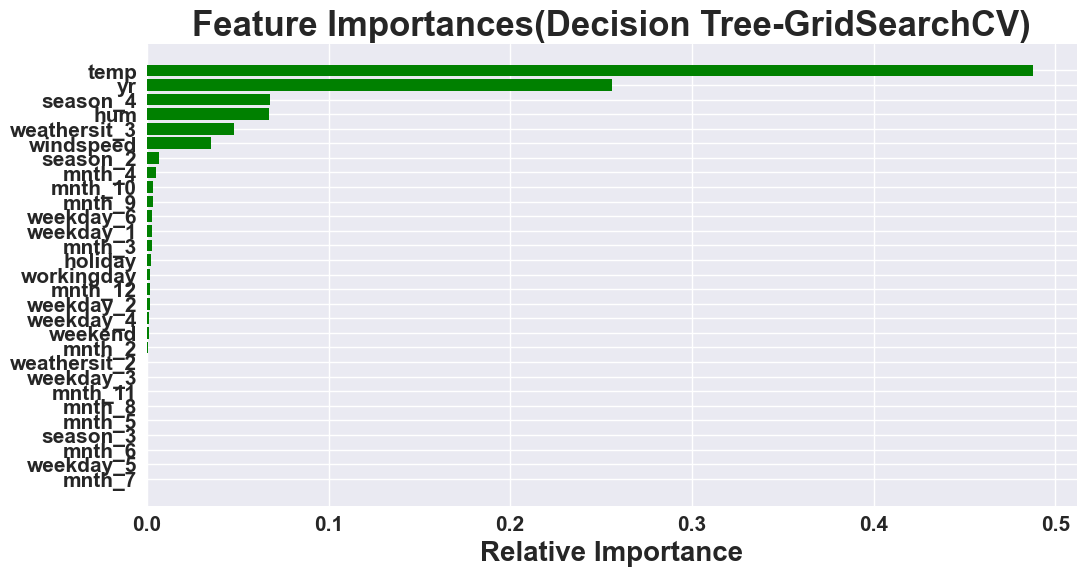

In [32]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Random Forest Regressor

In [33]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
import joblib

# Save the decision tree model
joblib.dump(rf, "randomforest.pkl")

print("Model saved as randomforest_model.pkl")

Model saved as randomforest_model.pkl


In [35]:
rf.score(X_test,y_test)

0.8619423098204717

In [36]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [37]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.472180223637142.
The Mean Squred Error(MSE) is 39.216126910270305.
The Root Mean Squared Error(RMSE) is 6.2622780926968025.
The R2 Score is 0.8619423098204717.
Adjusted R2 is 0.8277228823400757.


In [38]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [39]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.7610
1,Random Forest Regressor,4.4722,39.2161,6.2623,0.8619,0.8277


### GridSearchCV On Random Forest

In [40]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [41]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [42]:
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 100}
The best negative mean squred error value is -40.95769589991694


In [43]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

,n_estimators,80
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
import joblib

# Save the decision tree model
joblib.dump(rf_rg, "random_forest(CV).pkl")

print("Model saved as randomforest(CV).pkl")

Model saved as randomforest(CV).pkl


In [45]:
rf_rg.score(X_test,y_test)

0.8653491290708626

In [46]:
y_pred_train = rf_rg.predict(X_train)
y_pred = rf_rg.predict(X_test)

In [47]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.350601013640793.
The Mean Squred Error(MSE) is 38.248399173336956.
The Root Mean Squared Error(RMSE) is 6.184529017907262.
The R2 Score is 0.8653491290708626.
Adjusted R2 is 0.8319741268747516.


In [48]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [49]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.7610
1,Random Forest Regressor,4.4722,39.2161,6.2623,0.8619,0.8277
2,Random Forest Regressor(GridsearchCV),4.3506,38.2484,6.1845,0.8653,0.8320


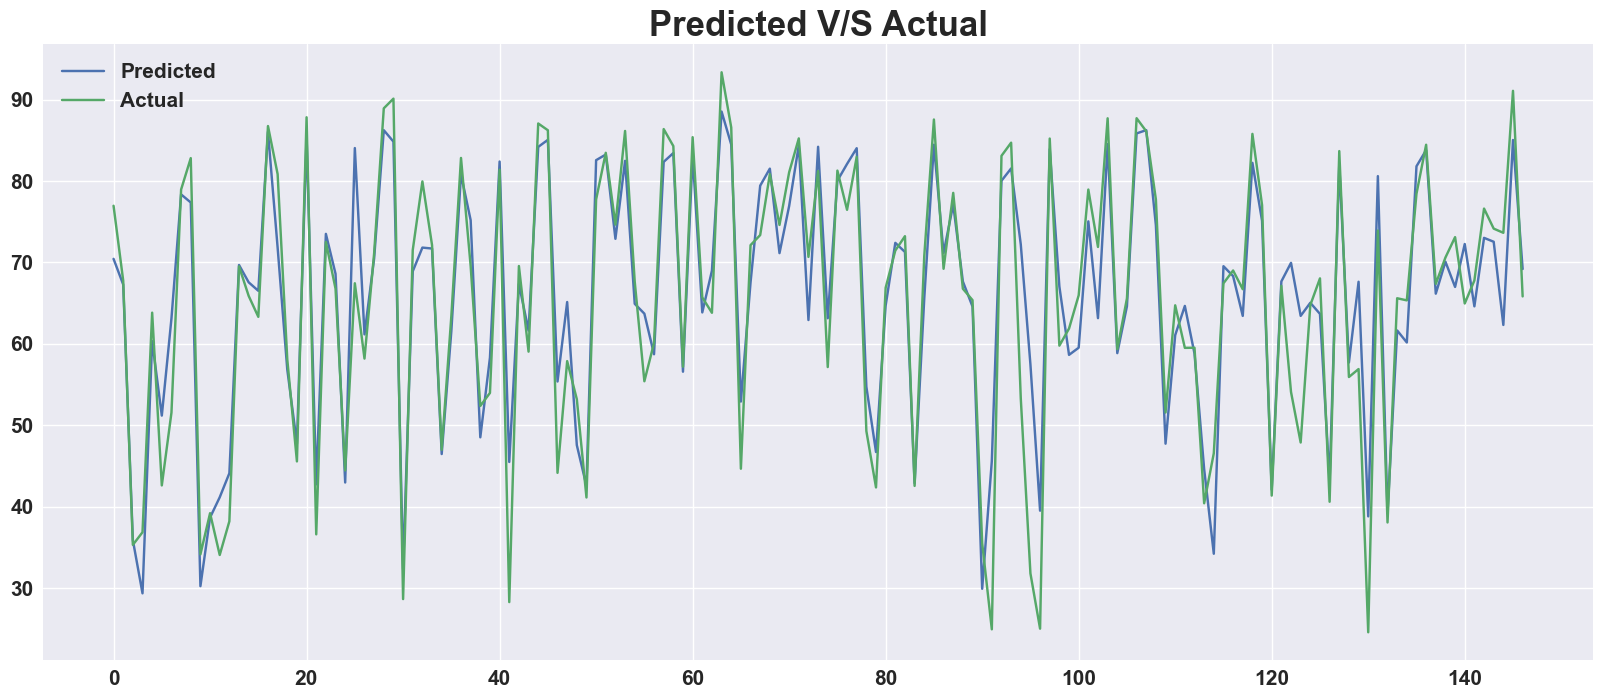

In [50]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

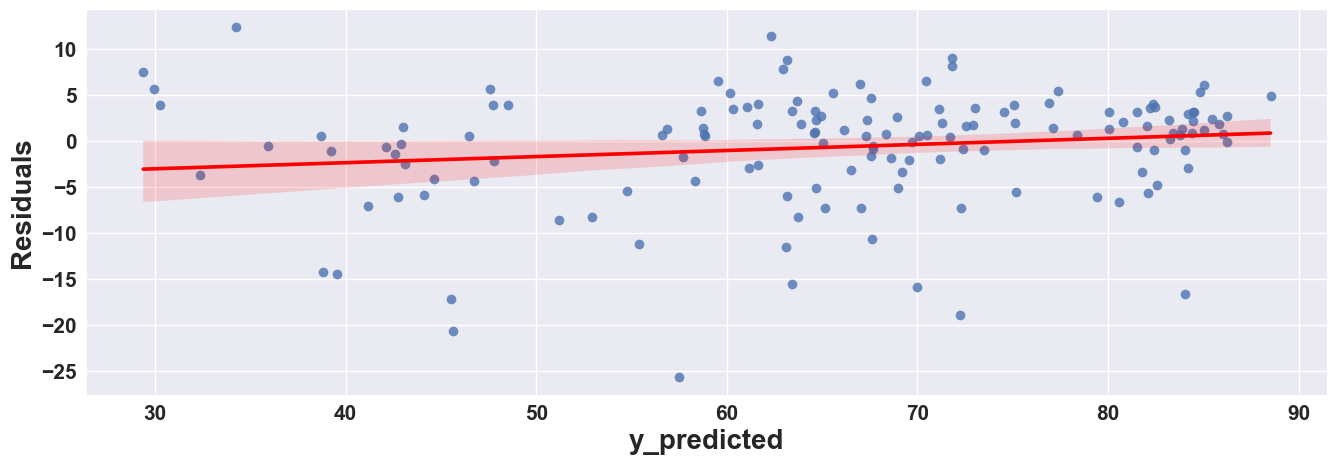

In [51]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

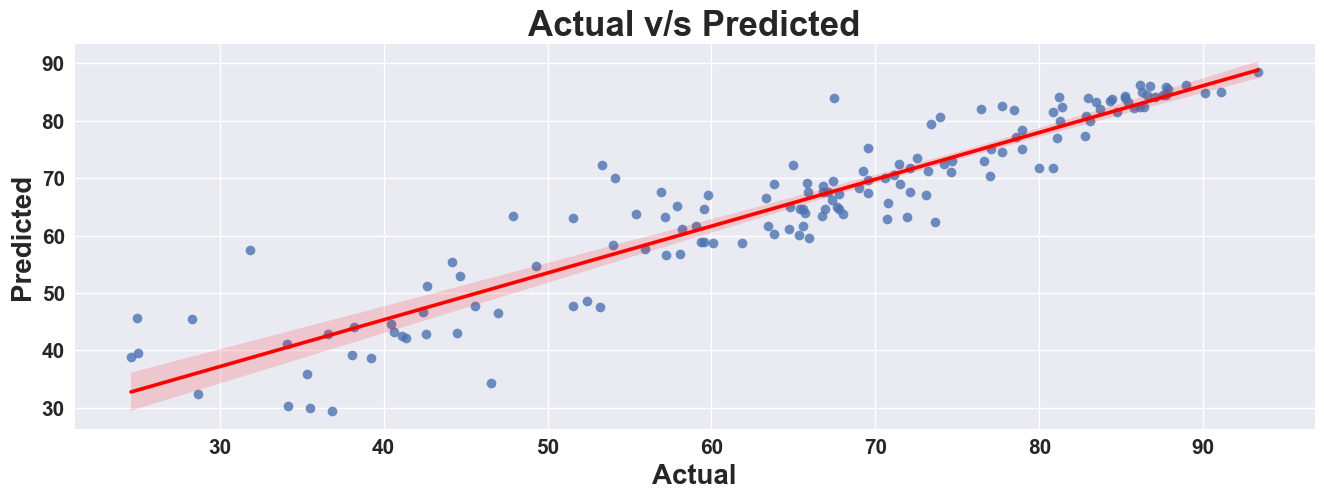

In [52]:
plot_scatter(y_pred,y_test)

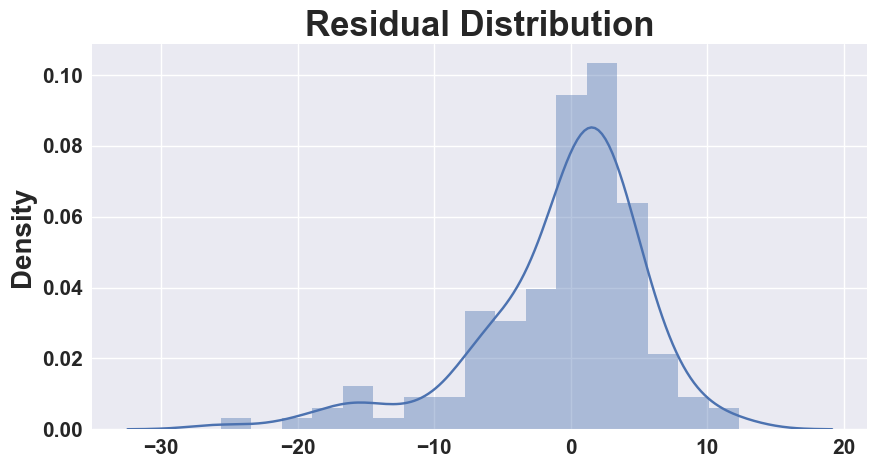

In [53]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

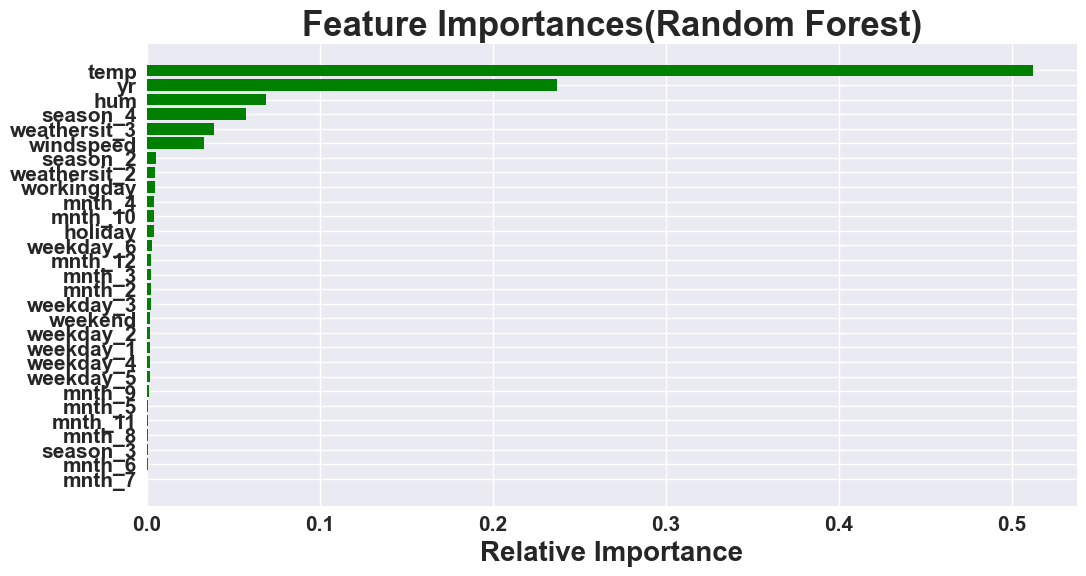

In [54]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Gradient Boosting

In [55]:
gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [56]:
import joblib

# Save the decision tree model
joblib.dump(gradboo_reg, "gradient_boost.pkl")

print("Model saved as gradient_boost.pkl")

Model saved as gradient_boost.pkl


In [57]:
gradboo_reg.score(X_test,y_test)

0.8625713892126403

In [58]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred = gradboo_reg.predict(X_test)

In [59]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.37530311835384.
The Mean Squred Error(MSE) is 39.037433081278685.
The Root Mean Squared Error(RMSE) is 6.247994324683617.
The R2 Score is 0.8625713892126403.
Adjusted R2 is 0.8285078873935512.


In [60]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [61]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.7610
1,Random Forest Regressor,4.4722,39.2161,6.2623,0.8619,0.8277
2,Random Forest Regressor(GridsearchCV),4.3506,38.2484,6.1845,0.8653,0.8320
3,Gardient boosting Regression,4.3753,39.0374,6.2480,0.8626,0.8285


### GridSearchCV on Gradient Boosting Regressor

In [62]:
gbr = GradientBoostingRegressor()

In [63]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [64]:
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
grad_boo_tuning.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [50, 80, ...], 'subsample': [0.9, 0.5, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [65]:
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.03, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8620307179983366


In [66]:
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

import joblib

# Save the decision tree model
joblib.dump(grad_tuned, "gradient_boost(CV).pkl")

print("Model saved as gradient_boost(CV).pkl")


Model saved as gradient_boost(CV).pkl


In [67]:
grad_tuned.score(X_test,y_test)

0.8886237774607136

In [68]:
y_pred_train = grad_tuned.predict(X_train)
y_pred = grad_tuned.predict(X_test)

In [69]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.028242897791843.
The Mean Squred Error(MSE) is 31.63709368313645.
The Root Mean Squared Error(RMSE) is 5.624686096408976.
The R2 Score is 0.8886237774607136.
Adjusted R2 is 0.8610177052073862.


In [70]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [71]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.7610
1,Random Forest Regressor,4.4722,39.2161,6.2623,0.8619,0.8277
2,Random Forest Regressor(GridsearchCV),4.3506,38.2484,6.1845,0.8653,0.8320
3,Gardient boosting Regression,4.3753,39.0374,6.2480,0.8626,0.8285
4,Gradient Boosting Regression(GridSearchCV),4.0282,31.6371,5.6247,0.8886,0.8610


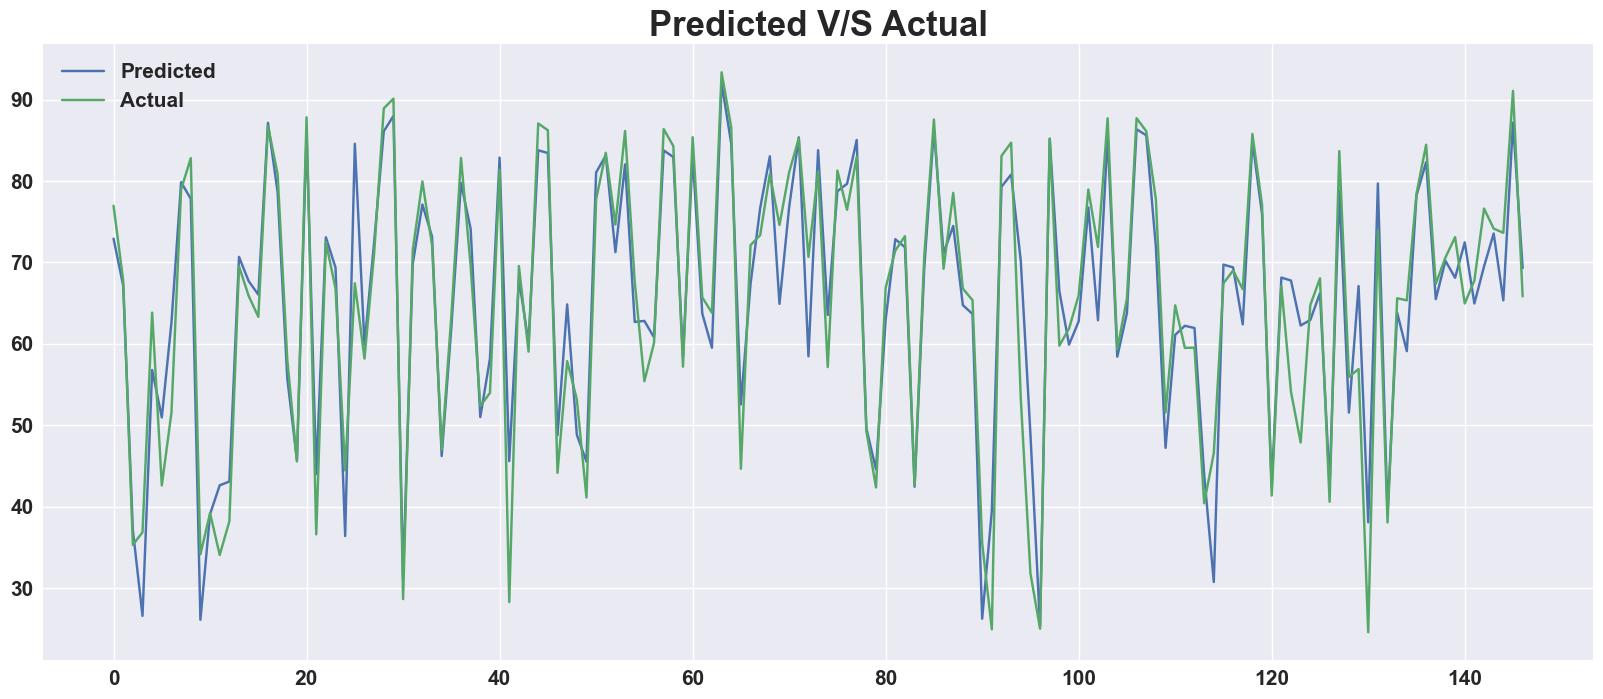

In [72]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

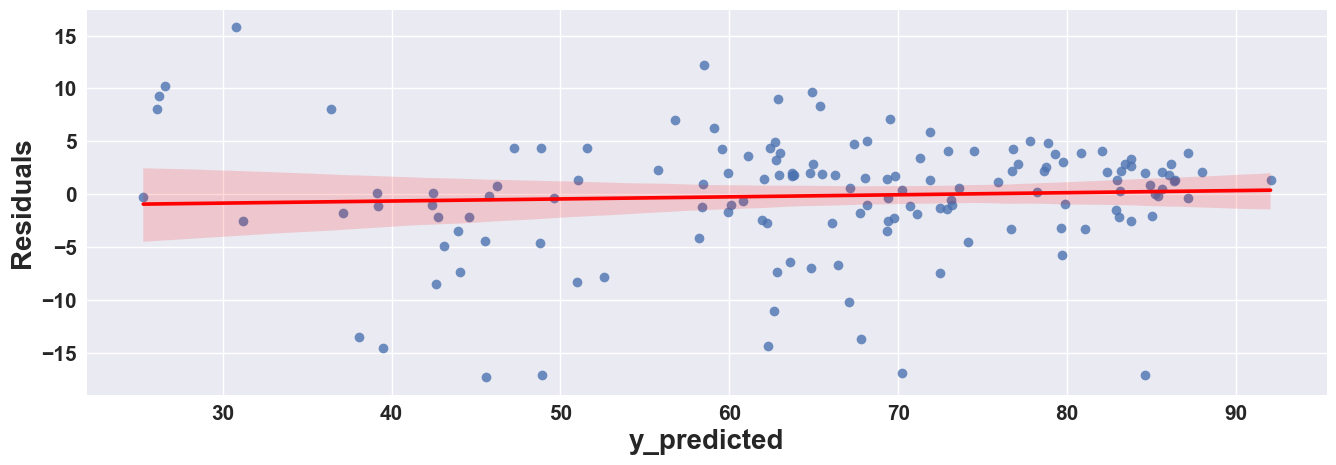

In [73]:
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

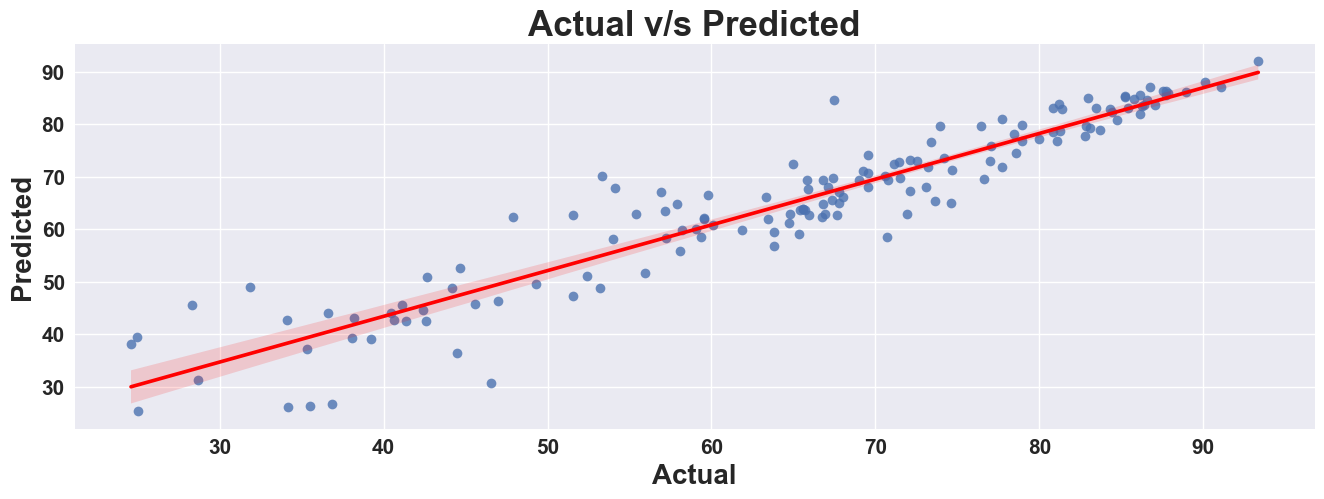

In [74]:
plot_scatter(y_pred,y_test)

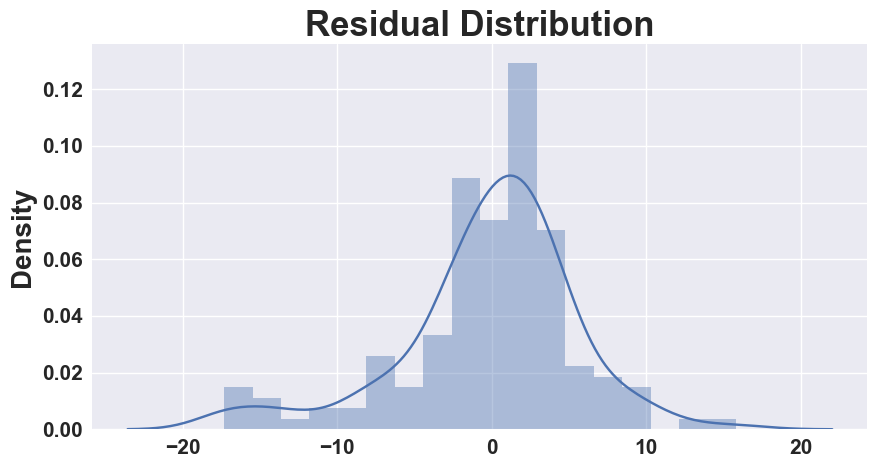

In [75]:
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

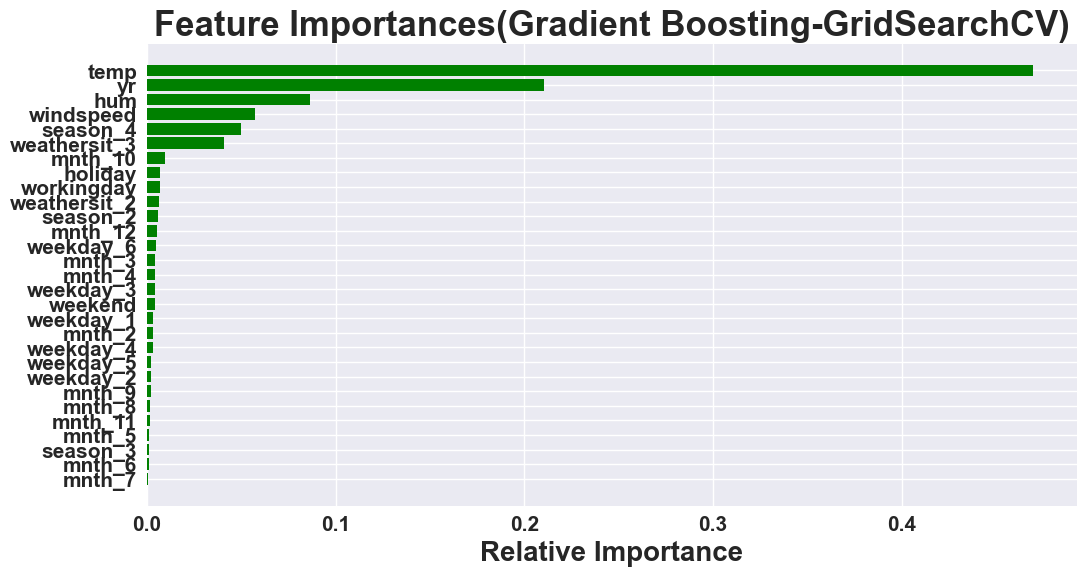

In [76]:
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

### Final Comaparison : -

In [77]:
import pandas as pd

test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)

test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Decision Tree Regressor(GridsearchCV),5.1536,54.4002,7.3756,0.8085,0.7610
1,Random Forest Regressor,4.4722,39.2161,6.2623,0.8619,0.8277
2,Random Forest Regressor(GridsearchCV),4.3506,38.2484,6.1845,0.8653,0.8320
3,Gardient boosting Regression,4.3753,39.0374,6.2480,0.8626,0.8285
4,Gradient Boosting Regression(GridSearchCV),4.0282,31.6371,5.6247,0.8886,0.8610
5,Gradient Boosting Regression(GridSearchCV),4.0282,31.6371,5.6247,0.8886,0.8610
